In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from skimage.io import imread, imread_collection, imshow, imshow_collection
from skimage.transform import resize

# Analysis of the original Thingi data (not all 10K, but some 700 of them)

As I wrote in the cleaning step of the original data, I was not able to process all 700 of the meshes due to time, comutational limitations and the fact that I still didn't have enough time to optimize the simplification algorithm (at least I did some of the todos concerning boundry preservation and mesh inversions). Now I will open the original mesh geometric data and do some exploration of it.

In [2]:
geom_data = pd.read_csv("./../data/csv_data/cleaned_Thingi_data/geometric_data_Thingi700.csv", index_col=0)

In [3]:
geom_data.shape

(700, 48)

In [4]:
geom_data.columns

Index(['file_id', 'num_vertices', 'num_faces',
       'num_geometrical_degenerated_faces',
       'num_combinatorial_degenerated_faces', 'num_connected_components',
       'num_boundary_edges', 'num_duplicated_faces', 'euler_characteristic',
       'num_self_intersections', 'num_coplanar_intersecting_faces',
       'vertex_manifold', 'edge_manifold', 'oriented', 'total_area',
       'min_area', 'p25_area', 'median_area', 'p75_area', 'p90_area',
       'p95_area', 'max_area', 'min_valance', 'p25_valance', 'median_valance',
       'p75_valance', 'p90_valance', 'p95_valance', 'max_valance',
       'min_dihedral_angle', 'p25_dihedral_angle', 'median_dihedral_angle',
       'p75_dihedral_angle', 'p90_dihedral_angle', 'p95_dihedral_angle',
       'max_dihedral_angle', 'min_aspect_ratio', 'p25_aspect_ratio',
       'median_aspect_ratio', 'p75_aspect_ratio', 'p90_aspect_ratio',
       'p95_aspect_ratio', 'max_aspect_ratio', 'solid', 'ave_area',
       'ave_valance', 'ave_dihedral_angle', 'ave_

In [5]:
geom_data.dtypes

file_id                                  int64
num_vertices                             int64
num_faces                                int64
num_geometrical_degenerated_faces        int64
num_combinatorial_degenerated_faces      int64
num_connected_components                 int64
num_boundary_edges                       int64
num_duplicated_faces                     int64
euler_characteristic                     int64
num_self_intersections                   int64
num_coplanar_intersecting_faces          int64
vertex_manifold                          int64
edge_manifold                            int64
oriented                                 int64
total_area                             float64
min_area                               float64
p25_area                               float64
median_area                            float64
p75_area                               float64
p90_area                               float64
p95_area                               float64
max_area     

In [6]:
geom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   file_id                              700 non-null    int64  
 1   num_vertices                         700 non-null    int64  
 2   num_faces                            700 non-null    int64  
 3   num_geometrical_degenerated_faces    700 non-null    int64  
 4   num_combinatorial_degenerated_faces  700 non-null    int64  
 5   num_connected_components             700 non-null    int64  
 6   num_boundary_edges                   700 non-null    int64  
 7   num_duplicated_faces                 700 non-null    int64  
 8   euler_characteristic                 700 non-null    int64  
 9   num_self_intersections               700 non-null    int64  
 10  num_coplanar_intersecting_faces      700 non-null    int64  
 11  vertex_manifold                      

In [7]:
geom_data.head()

,file_id,num_vertices,num_faces,num_geometrical_degenerated_faces,num_combinatorial_degenerated_faces,num_connected_components,num_boundary_edges,num_duplicated_faces,euler_characteristic,num_self_intersections,...,median_aspect_ratio,p75_aspect_ratio,p90_aspect_ratio,p95_aspect_ratio,max_aspect_ratio,solid,ave_area,ave_valance,ave_dihedral_angle,ave_aspect_ratio
0,100026,117,270,11,0,1,0,0,-10,41,...,6.310514,12.165969,46.811937,781.652003,2.893786e+04,0,88.978533,6.786325,0.687029,4.306460e+02
1,100029,202,452,20,0,2,2,0,-21,78,...,5.883755,13.943467,43.728817,236.363485,3.613401e+05,0,54.906153,6.683168,0.664232,-1.678319e+12
2,100031,310,640,0,0,1,0,0,-10,0,...,4.097340,53.188379,301.263420,907.033426,1.623939e+06,0,7.525323,6.193548,0.556337,7.135918e+03
3,100032,1516,3128,2,0,5,0,0,-48,6,...,5.878338,62.333636,258.575673,767.384013,1.775330e+06,0,7.564010,6.189974,0.555797,2.068542e+03
4,100075,726,1460,0,0,6,0,0,-4,439,...,2.468472,4.301440,17.433854,45.984571,1.091391e+04,0,0.048308,6.033058,0.552144,4.345601e+01


## Some random EDA of features

### Number of vertices and faces. Distributions

Let's start by examining the distribution of the number of vertices and faces. These features are important as they indicate the complexity of the mesh (like we said in the cleaning process when we left these features). I will use `sns` for most of the plots as I like them. The KDE curve overlaid on the histogram provides in general a smoothed estimate of the distribution, making it easier to see the overall trend (at least I hope it will).

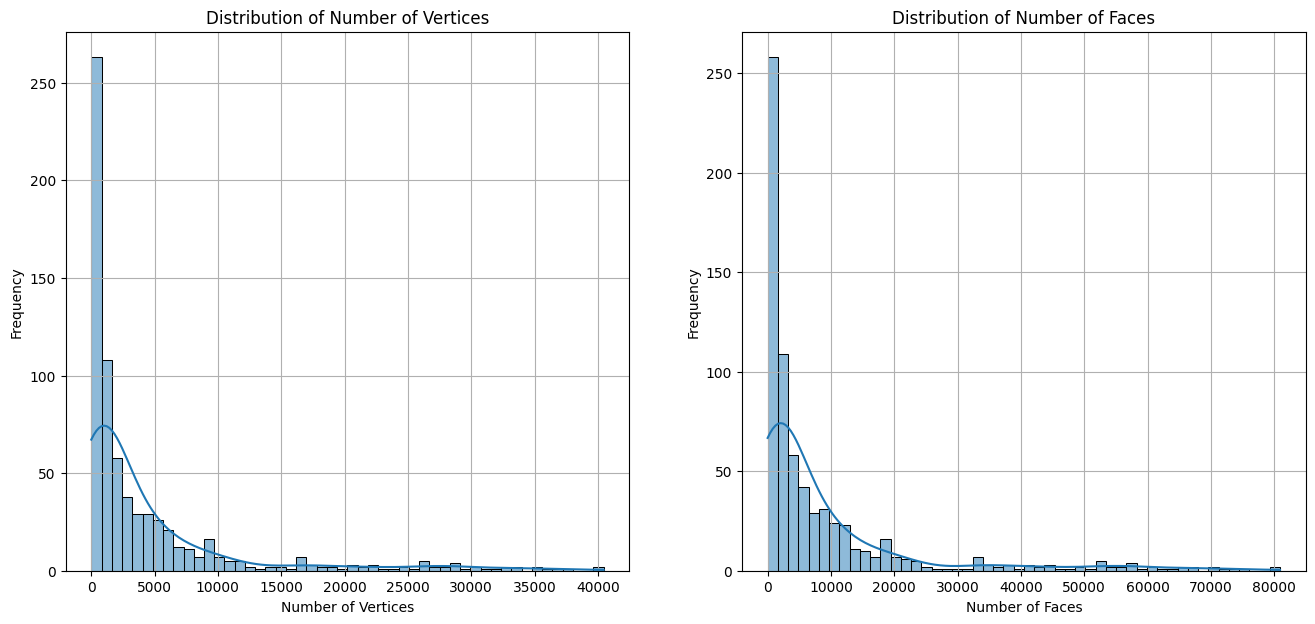

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.histplot(geom_data.num_vertices, bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Number of Vertices')
axes[0].set_xlabel('Number of Vertices')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

sns.histplot(geom_data.num_faces, bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Number of Faces')
axes[1].set_xlabel('Number of Faces')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)
plt.show()

We have a lot of models with a small number of vertices due to the limitations of time, space and complexity I talked about earlier. It left to work with simpler meshes.

The same tendency goes for the faces. So, in summary:
 We have that the distributions of teh vertices and faces numbers are heavily skewed to the right, meaning most models have a relatively low number of faces. There's a sharp peak near the lower end of the scale, with a large number of models having fewer than 5,000 faces. The tail extends towards higher numbers of faces, indicating that while most models are simple, there are some that are very complex with a large number of faces (our outliers :)) (random selction for models under 3MB).

### Total surface area. Distribution

Next, let's explore the distribution of the total surface area.

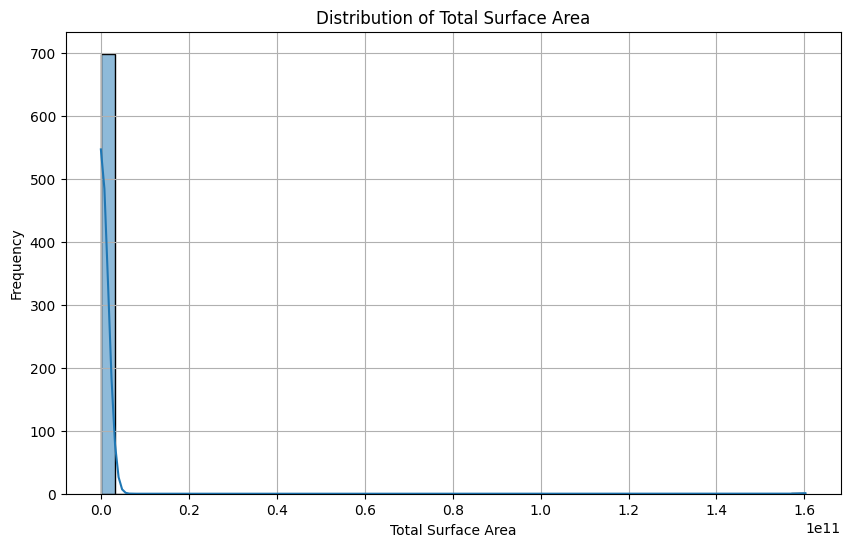

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(geom_data.total_area, bins=50, kde=True)
plt.title('Distribution of Total Surface Area')
plt.xlabel('Total Surface Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

I cannot understand much of this, so let's do a log scale

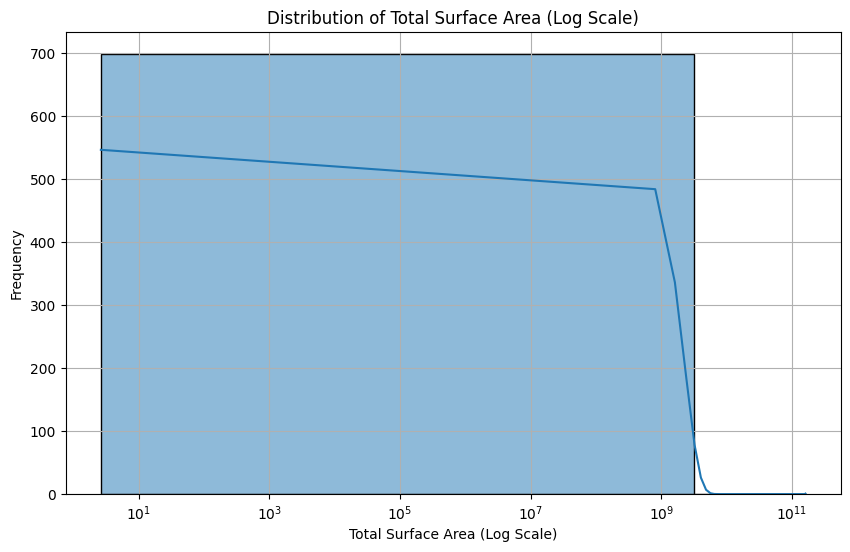

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(geom_data.total_area, bins=50, kde=True)
plt.xscale('log')
plt.title('Distribution of Total Surface Area (Log Scale)')
plt.xlabel('Total Surface Area (Log Scale)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The plot shows the distribution of total surface areas for the 3D meshes on a logarithmic scale. Most meshes have relatively small surface areas, as indicated by the high frequency on the lower end of the scale, while a few have significantly larger surface areas, resulting in a steep drop-off. This suggests a right-skewed distribution, where most models are small, with a small number of large, potentially complex models acting as outliers, like I said earlier with the plots of the number of vertices and faces.

### The Euler characteristic of the meshes and correlation with other features we reviewed so far

The Euler characteristic is a topological invariant that provides a fundamental description of a shape or structure in geometry and topology. For a 3D mesh, it offers a measure that reflects the mesh's overall structure and connectivity. The Euler characteristic provides insight into a mesh's topology by revealing the number of holes, disconnected components, and surface connections. It also serves as a quality check, where non-standard values can indicate potential issues that may need addressing, especially during processes like 3D printing or mesh simplification.

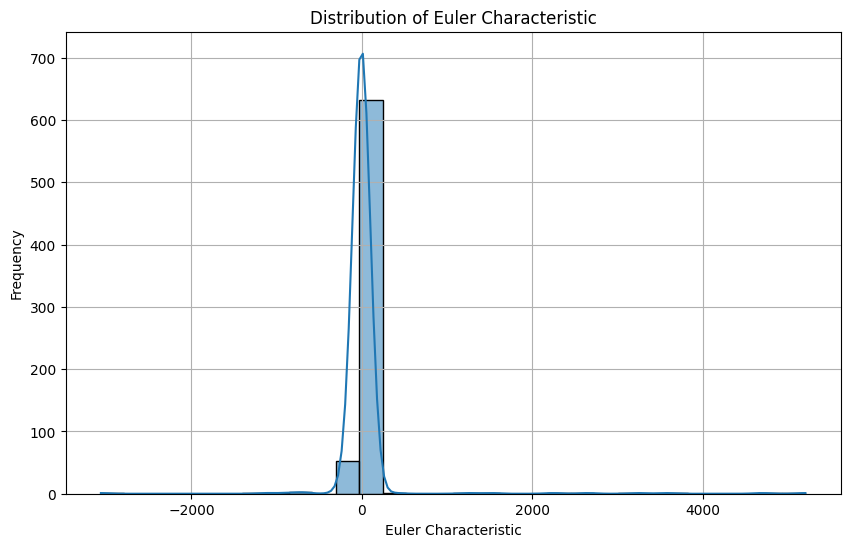

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(geom_data.euler_characteristic, bins=30, kde=True)
plt.title('Distribution of Euler Characteristic')
plt.xlabel('Euler Characteristic')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The majority of the meshes have an Euler characteristic close to zero, indicating they have a topology similar to a simple, closed surface like a sphere or cube (like I said most meshes were simple). The long tails, particularly the one extending to the negative side, indicate that there are a few meshes with much more complex topologies, such as those with many holes or disconnected components and maybe those will be interesting to see how they were simplified. The Garland & Heckbert algorithm can close holes by design, so it will be interesting to see if this characteristic has changed for them and in which direction (positive or negative). In summary I can say that the overall distribution non-normal and heavily skewed, even though it looks a bit like a normal distribution.

Let's see if the Euler characteristic is related somehow to the number of faces in a mesh.

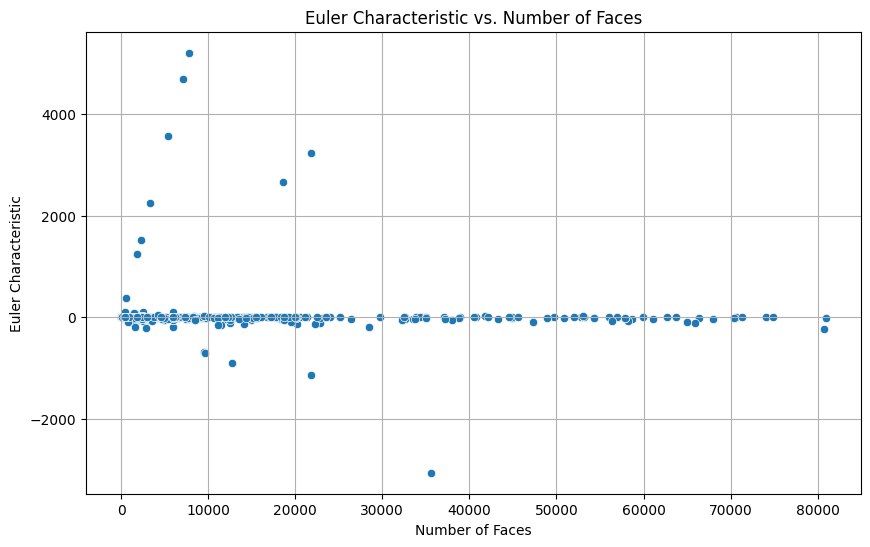

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=geom_data.num_faces, y=geom_data.euler_characteristic)
plt.title('Euler Characteristic vs. Number of Faces')
plt.xlabel('Number of Faces')
plt.ylabel('Euler Characteristic')
plt.grid(True)
plt.show()

Most of the data points are concentrated near an Euler characteristic of zero, indicating that many meshes have relatively simple topologies regardless of their face count. This suggests that increasing the number of faces does not necessarily lead to more complex topological features like additional holes or disconnected components. However, there are some outliers with both very high and very low Euler characteristics, particularly for meshes with fewer faces (less than 20,000). These outliers indicate meshes with unusually complex topologies, either with many holes (negative Euler characteristic) or with numerous disconnected components or complex surface connections (positive Euler characteristic). As the number of faces increases, the Euler characteristic tends to stabilize around zero, implying that larger, more detailed meshes in this dataset are more likely to represent topologically simple structures.

Let's see some of the meshes having bizzare Euler characteristisc (we will use our previews).

In [13]:
mean_euler = geom_data.euler_characteristic.mean()
std_euler = geom_data.euler_characteristic.std()
# We'll consider anything far from the mean as bizarre (e.g., more than 3 standard deviations)
threshold = 3 * std_euler

# Filter out the outliers
outliers = geom_data[(geom_data.euler_characteristic > mean_euler + threshold) | (geom_data.euler_characteristic < mean_euler - threshold)]

# Get the file IDs of these outliers and their characteristics
outlier_file_ids = outliers['file_id'].tolist()
outlier_file_euler_characteristic = outliers['euler_characteristic'].tolist()

In [14]:
outliers

,file_id,num_vertices,num_faces,num_geometrical_degenerated_faces,num_combinatorial_degenerated_faces,num_connected_components,num_boundary_edges,num_duplicated_faces,euler_characteristic,num_self_intersections,...,median_aspect_ratio,p75_aspect_ratio,p90_aspect_ratio,p95_aspect_ratio,max_aspect_ratio,solid,ave_area,ave_valance,ave_dihedral_angle,ave_aspect_ratio
478,138092,1152,7092,0,0,3,0,2364,4698,7092,...,2.291174,8.224172,35.133586,108.687098,9.997925e+04,0,2.505195,6.156250,0.000000,4.351929e+02
479,138095,309,1854,0,0,1,0,618,1236,1998,...,5.621671,9.470045,31.955512,53.616684,1.416144e+04,0,4.564642,6.000000,0.000000,5.146581e+01
480,138189,380,2268,18,0,2,0,756,1514,2484,...,4.419541,11.207749,25.305615,90.108148,4.168084e+04,0,10.395554,5.968421,0.000000,1.623075e+02
481,138193,1284,7848,0,0,1,0,2616,5208,8739,...,2.600795,7.479744,45.485775,189.117791,1.269636e+12,0,3.054319,6.112150,0.000000,1.193506e+09
483,138199,570,3360,0,0,5,0,1120,2250,3360,...,6.505749,19.171018,73.986112,73.986990,3.896491e+03,0,2.311555,5.894737,0.000000,3.939959e+01
484,138208,836,5448,0,0,1,0,1816,3563,5448,...,1.760907,3.880433,24.082854,223.270636,3.495488e+12,0,23.373871,6.509569,0.000000,1.398132e+10
513,145065,14744,35614,0,0,1,0,0,-3063,523,...,3.723833,7.475953,38.124397,138.681676,7.452224e+09,0,0.215210,7.246473,0.651619,6.423841e+05
551,1508788,11982,18656,0,0,1329,0,0,2654,36726,...,1.520821,1.879008,2.302088,3.202617,3.015364e+03,0,1.486217,4.671007,1.000829,3.636330e+00
552,1508790,14160,21852,0,0,1620,0,0,3234,52052,...,1.783661,3.034689,3.088880,7.101919,2.204759e+04,0,2.581304,4.629661,1.004200,1.038349e+01
648,1745353,9772,21812,0,0,1,0,0,-1134,14,...,3.009632,11.949241,42.961292,101.068086,1.012454e+07,0,4.078439,6.696275,0.558097,1.922407e+03


In [15]:
outlier_file_ids

[138092,
 138095,
 138189,
 138193,
 138199,
 138208,
 145065,
 1508788,
 1508790,
 1745353]

In [16]:
image_pattern = [os.path.join("./../data/Thingi10K/previews", f"{file_id}.png") for file_id in outlier_file_ids]

In [17]:
images = imread_collection(image_pattern)
images

In [18]:
len(images.files)

10

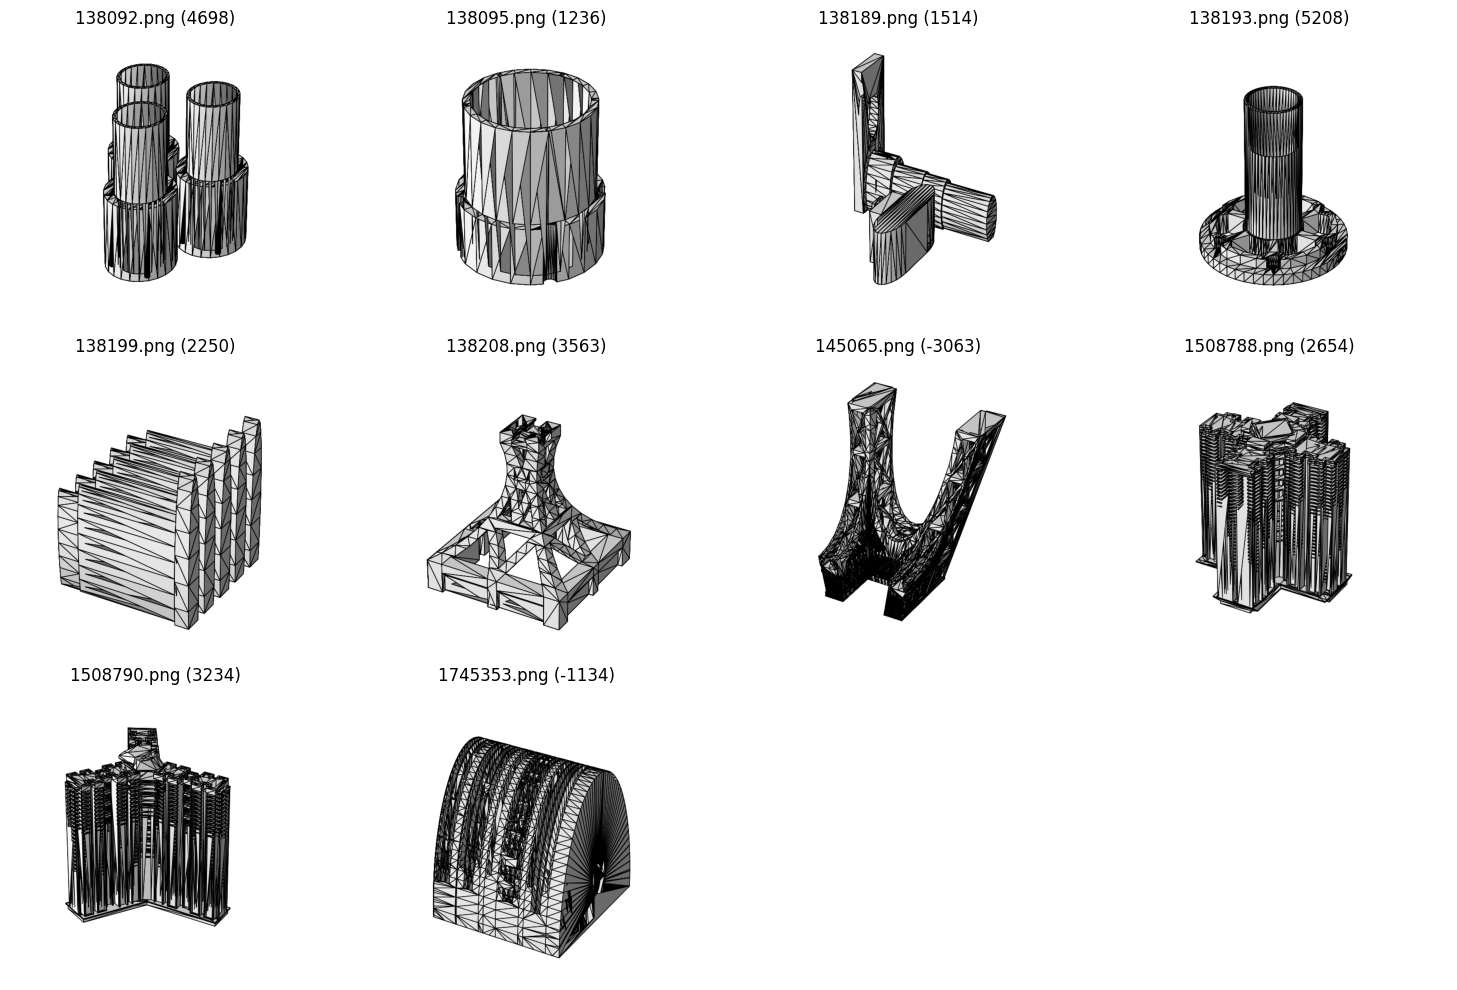

In [19]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each image in a subplot
for ax, img, image_name, char in zip(axes, images, outlier_file_ids, outlier_file_euler_characteristic):
    ax.imshow(img)
    ax.set_title(f"{image_name}.png ({char})")
    ax.axis('off')

# If there are more subplots than images, turn off the empty ones
for ax in axes[len(images):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


These meshes will be interesting to be seen simplified.

Now, let's see a correlation heatmap of some the features we explored up now including `num_connected_components` which I must have a non-zero correlation with the euler_characteristic of the mesh.

In [20]:
correlation_columns = ['euler_characteristic', 'num_vertices', 'num_faces', 'num_connected_components', 'total_area']
correlation_matrix = geom_data[correlation_columns].corr()

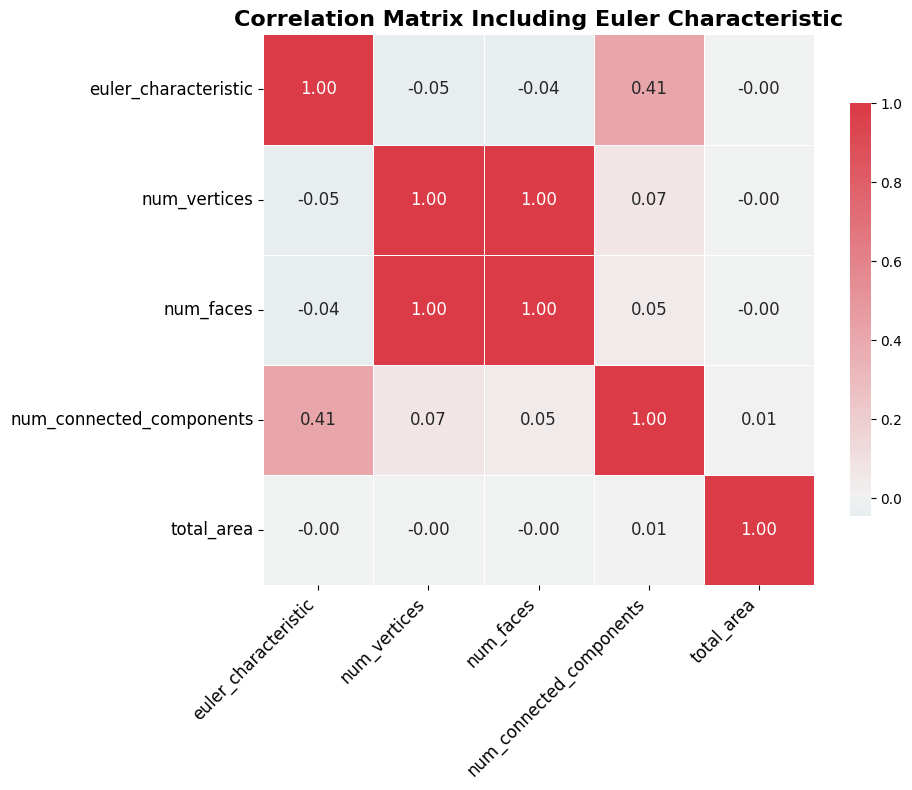

In [21]:
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot_kws={"size": 12})
plt.title('Correlation Matrix Including Euler Characteristic', fontsize=16, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()

plt.show()

So, the Euler characteristic has a moderate positive correlation (0.41) with the number of connected components, which suggests that models with more separate parts tend to have higher or more extreme Euler characteristic values and the relationship w.r.t. the other varibles is almost insignificant. We also see that the number of vertices and number of faces are perfectly correlated (1.00), which is expected since more complex models tend to have both more vertices and faces and we saw this graphically in the analysis above.

## Analyzing Mesh Characteristics for Simplification

When simplifying 3D meshes, the goal is to reduce the number of vertices and faces while maintaining the mesh's appearance and structural integrity. Understanding which characteristics make some meshes easier to simplify and others more prone to degradation is crucial. Below, we'll analyze several key features with this task in mind.

### Degenerated Faces

Meshes with a high number of degenerated faces (geometrical or combinatorial) are often more problematic during simplification. Degenerated faces may cause the simplification algorithm to behave unpredictably, leading to poor results or even mesh corruption. High counts of degenerated faces might indicate a low-quality mesh that could degrade significantly during simplification.

I guess we can rule out any of our meshes to have degenerate faces due to combinatorial properties (Combinatorial properties of a mesh refer to the relationships and connections between the vertices, edges, and faces of the mesh, independent of their specific geometric positions. In the context of degenerate faces, these properties involve how vertices are connected to form edges and how edges are connected to form faces. A mesh might have degenerate faces due to combinatorial properties if it has vertex repetitions, incorrect topology or non-manifold edges)

In [22]:
geom_data.num_combinatorial_degenerated_faces.unique()

array([0])

In [23]:
geom_data.num_geometrical_degenerated_faces.value_counts()

num_geometrical_degenerated_faces
0      633
1       11
4       10
11       6
2        5
3        4
14       3
26       3
8        3
6        2
7        2
22       2
5        2
9        2
42       1
20       1
43       1
81       1
18       1
726      1
124      1
16       1
41       1
37       1
75       1
13       1
Name: count, dtype: int64

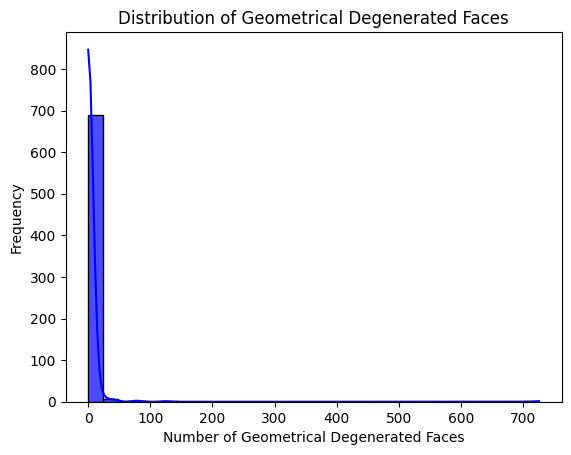

In [24]:
sns.histplot(geom_data.num_geometrical_degenerated_faces, bins=30, color='blue', alpha=0.7, kde=True)
plt.title('Distribution of Geometrical Degenerated Faces')
plt.xlabel('Number of Geometrical Degenerated Faces')
plt.ylabel('Frequency')
plt.show()

The plot shows that the majority of meshes have very few geometrical degenerated faces, with a sharp decline as the number of degenerated faces increases. The distribution is heavily right-skewed, indicating that while most meshes have a small number of degenerated faces, a few outliers have significantly more, which could pose challenges during mesh simplification (we count on them!).

### Boundary Edges and Duplicated Faces

Boundary edges and duplicated faces are important indicators of mesh quality.

Boundary edges indicate that the mesh is open (not watertight/solid), which may result in interesting simplification outcomes. Having the threshold hyperparameter of the Garland & Hechbert algorithm we may be able to close them for a big enough threshold.

Duplicated faces add unnecessary complexity and could result in less effective simplification if not handled properly. High numbers of duplicated faces could lead to redundant simplifications, where the mesh complexity remains high despite reducing the number of vertices or faces. This means that for some meshes the algorithm worked much harder to get a more mediocre result beacuse of these duplicates.

In [25]:
geom_data.num_boundary_edges.value_counts()

num_boundary_edges
0       656
4         5
12        3
24        2
788       2
20        2
278       1
2         1
6358      1
17        1
48        1
256       1
32        1
42        1
26        1
80        1
124       1
36        1
14        1
5842      1
54        1
112       1
232       1
1         1
96        1
94        1
62        1
88        1
154       1
180       1
6         1
204       1
283       1
426       1
5         1
18        1
Name: count, dtype: int64

In [26]:
geom_data.num_duplicated_faces.value_counts()

num_duplicated_faces
0       669
1        12
2         2
28        1
4         1
64        1
10        1
34        1
66        1
12        1
2364      1
618       1
756       1
2616      1
192       1
1120      1
1816      1
8         1
3         1
42        1
Name: count, dtype: int64

Most of the meshes don't have boundry edges or duplicate faces which is good, but there are some outliers. Typically duplicate faces are not intentionally placed but rather a type of bug from mesh merging, copy-pasting, export/imports or automatic mesh generation.

### Self-Intersections and Coplanar Intersecting Faces

These features indicate complex interactions within the mesh that could complicate the simplification process. Self-intersections often cause issues with rendering and physical simulations, leading to visual artifacts post-simplification, whereas coplanar intersecting faces might be mistakenly simplified as a single face, resulting in loss of detail or incorrect topology (;()).

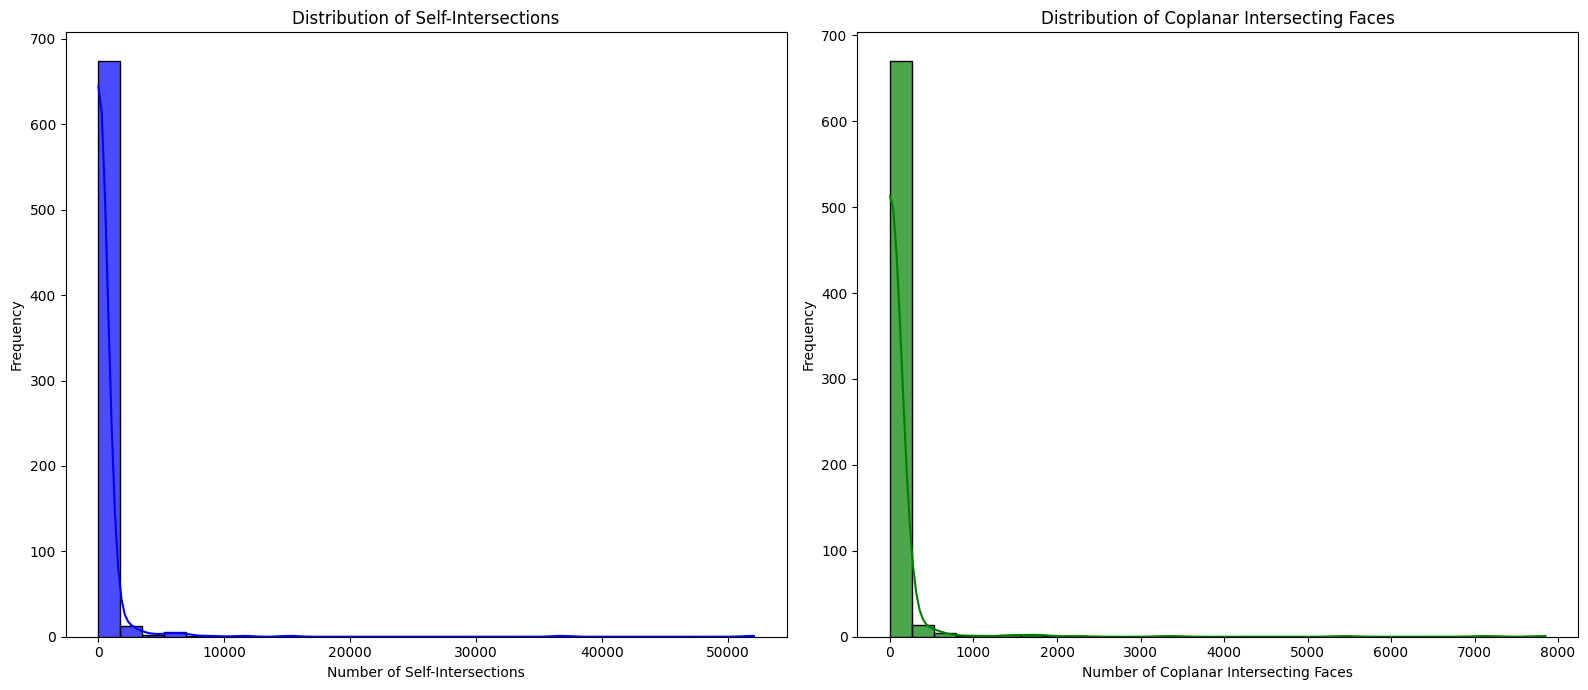

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.histplot(geom_data.num_self_intersections, bins=30, color='blue', alpha=0.7, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Self-Intersections')
axes[0].set_xlabel('Number of Self-Intersections')
axes[0].set_ylabel('Frequency')

sns.histplot(geom_data.num_coplanar_intersecting_faces, bins=30, color='green', alpha=0.7, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Coplanar Intersecting Faces')
axes[1].set_xlabel('Number of Coplanar Intersecting Faces')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Both distributions indicate that while most meshes are relatively clean, a subset contains significant complexities that could impact the effectiveness of the simplification algorithm, potentially leading to distortions or inaccuracies in the simplified models.

### Valance and Dihedral Angles

Valance refers to the number of edges connected to a vertex. Regular valance distribution (typically around 6 for most vertices) indicates a well-structured mesh, which simplifies well without significant loss of quality.
Dihedral Angles measure the angles between adjacent faces. Large or irregular dihedral angles suggest sharp edges or corners, which are critical for the mesh's appearance but may be smoothed out too much during simplification (one of the minuses of the algorithm I am using to simplify meshes).

We will use the median values as they are supplied in the dataset for us (someone else did the heavy lifting).

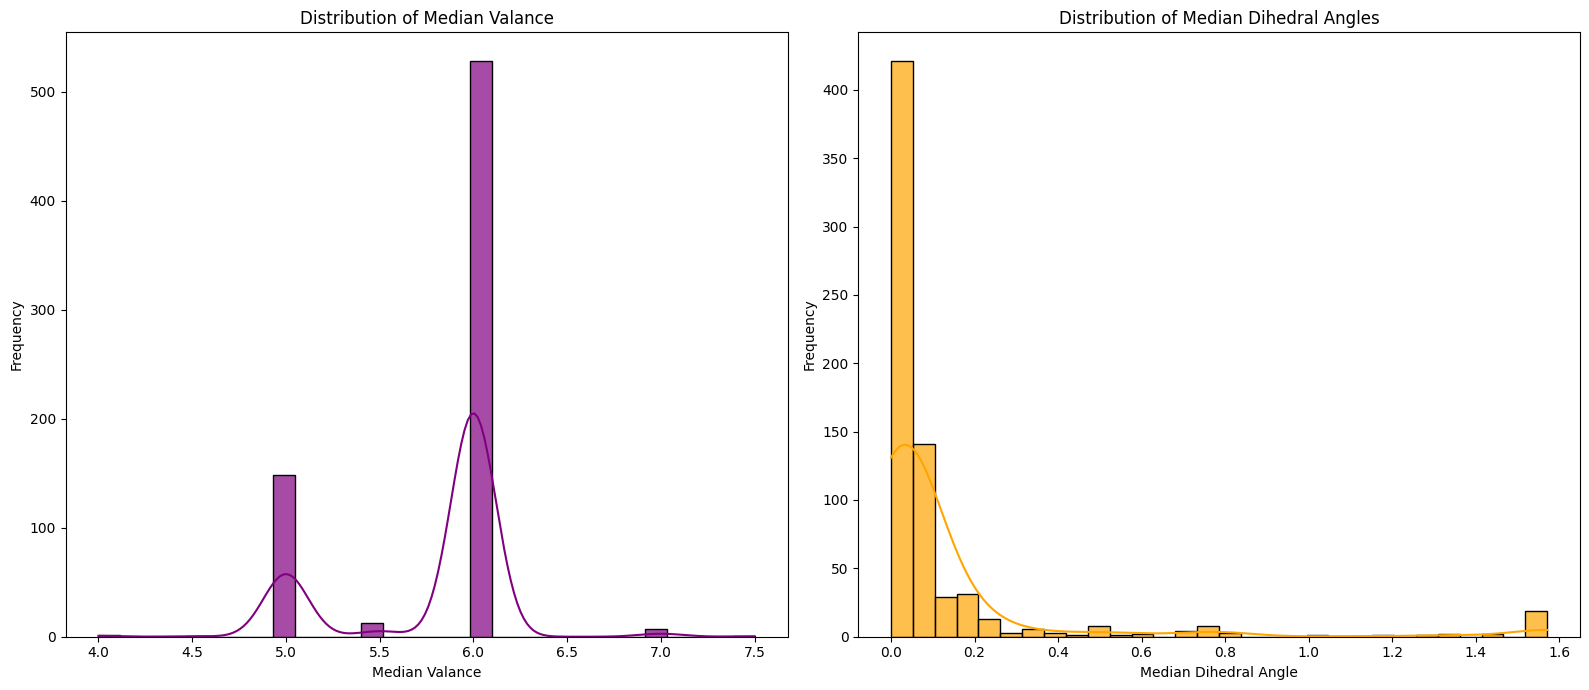

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.histplot(geom_data.median_valance, bins=30, color='purple', alpha=0.7, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Median Valance')
axes[0].set_xlabel('Median Valance')
axes[0].set_ylabel('Frequency')

sns.histplot(geom_data.median_dihedral_angle, bins=30, color='orange', alpha=0.7, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Median Dihedral Angles')
axes[1].set_xlabel('Median Dihedral Angle')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The plot to the left regading the valence of a vertex (mean) shows a distinct peak around a median valance of 6, which is typical for regular meshes where most vertices are surrounded by six faces (such as in quad meshes). There are also smaller peaks at 5 and 4, suggesting that some meshes have vertices with fewer connecting edges, which could indicate irregularity or lower complexity. The presence of multiple peaks indicates that the meshes vary in their structural regularity.

The plot to the right (Median Dihedral Angle) shows that most meshes have a small median dihedral angle, with a peak near 0 radians (indicating that the adjacent faces are nearly flat or have very slight angles). The long tail suggests that some meshes have sharper edges, where the dihedral angles are more significant. These sharp edges could be features that are critical to the appearance of the model and may need to be carefully preserved during simplification (sorry for the curves not preserved).


### Aspect Ratios

Aspect ratios give insight into the shape of the mesh’s faces. Highly skewed aspect ratios (very high or very low) may indicate that the mesh is prone to disproportionately be affected by simplification.

We will use the median and max values provided in the dataset.

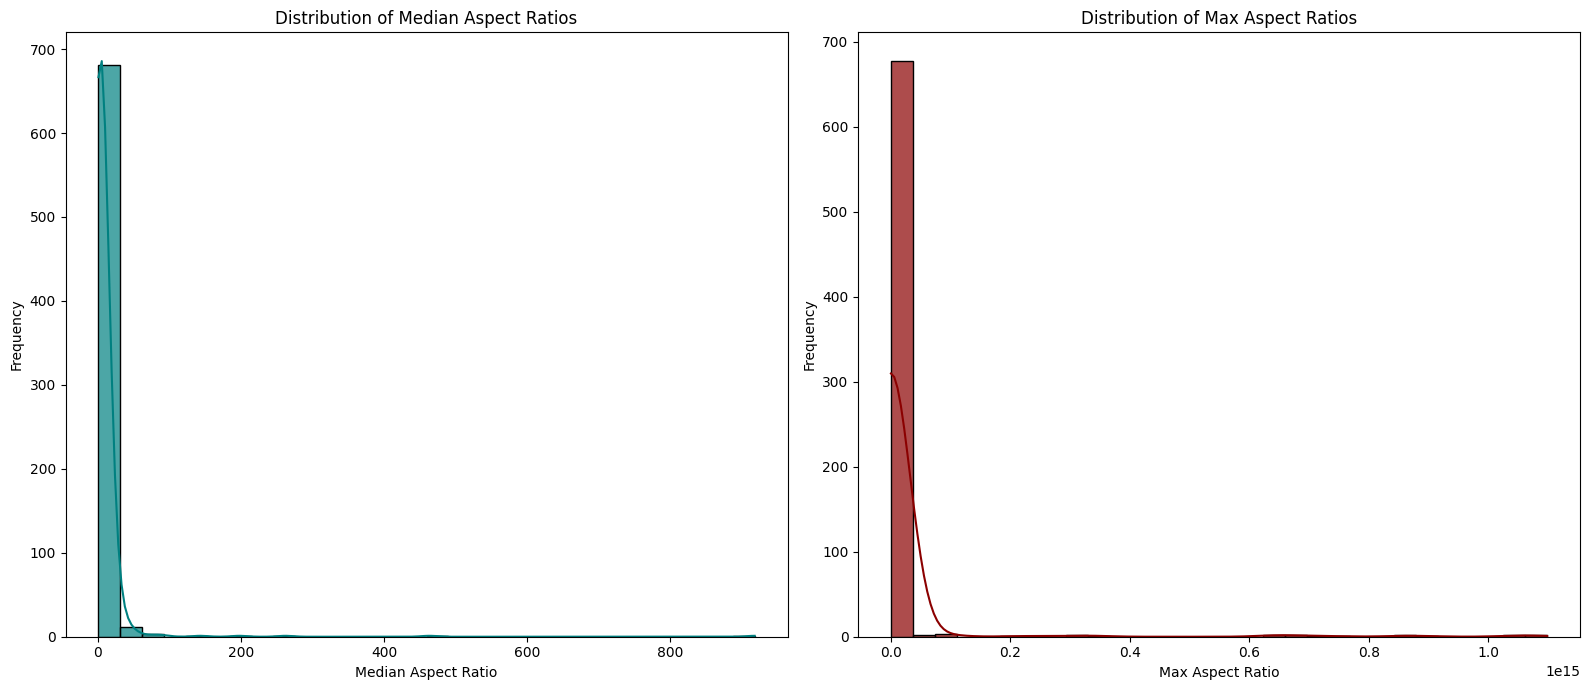

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.histplot(geom_data.median_aspect_ratio, bins=30, color='teal', alpha=0.7, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Median Aspect Ratios')
axes[0].set_xlabel('Median Aspect Ratio')
axes[0].set_ylabel('Frequency')

sns.histplot(geom_data.max_aspect_ratio, bins=30, color='darkred', alpha=0.7, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Max Aspect Ratios')
axes[1].set_xlabel('Max Aspect Ratio')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

These distributions suggest that while most meshes in the dataset are composed of well-proportioned faces, there are a few outliers with significantly higher aspect ratios that could complicate the simplification process.

## Conclusion for now

The analysis of the original Thingi10K dataset (well, 700 meshes of it) reveals significant insights into the complexity and quality of 3D meshes. Several geometric and topological features, such as the number of degenerated faces, self-intersections, and aspect ratios, show distinct patterns that could impact the effectiveness of mesh simplification processes. Notably, certain meshes exhibit extreme values in Euler characteristic, aspect ratios, and valance distributions, indicating potential challenges in maintaining structural integrity and appearance during simplification. These findings emphasize the need for careful consideration of these features when simplifying meshes, as they could determine the balance between preserving appearance and achieving simplification goals. The next steps in the analysis will involve comparing these original characteristics with the post-simplification results to assess how well different meshes retain their essential properties and visual fidelity (we will use some metric for visual fidelity like Hausdorff Distance and RMSE).